<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tiba0619/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tiba0619/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fa9608b9210>)

In [2]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
datas_predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1. 填補空值

a. 類別值: Pclass, Name(mid), Sex, Cabin(F), Embarked

b. 數值值: Age, SibSp, Parch, Ticket, Fare

補最可能的

a. 類別值: 最常出現的

b. 數值值: 中位數值

In [4]:
# ignore_index=True
datas_total = pd.concat([datas, datas_predict], axis=0)
datas_total = datas_total.drop(["PassengerId", "Survived"],axis=1)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
# demo pandas filter
# 帶入跟妳資料筆數一樣多的True False
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
d[[True, False, False]]

,0,1
0,1,2


In [7]:
v = datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(v)
# !!
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [8]:
med = datas_total.median().drop("Pclass")
datas_total = datas_total.fillna(med)
# !!
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

<ipython-input-8-475779067eca>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas_total.median().drop("Pclass")


Cabin    1014
dtype: int64

In [9]:
# demo:
s = "Kelly, Mr. James"
s.split(",")[-1].split(".")[0].strip()
import re
pat = r".+,(.+)\..+"
re.match(pat, s).group(1).strip()

'Mr'

In [10]:
def name(s):
    return s.split(",")[-1].split(".")[0].strip()
datas_total["Name"] = datas_total["Name"].apply(name)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,359309,8.0500,NaN,S


In [11]:
count = datas_total["Ticket"].value_counts()
def ticket(t):
    if pd.isna(t):
        return t
    else:
        return count[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C85,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C123,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C105,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [12]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [13]:
c = datas_total["Name"].value_counts()
reserved = c[c > 50].index
def name2(n):
    if n in reserved:
        return n
    else:
        return None
datas_total["Name"] = datas_total["Name"].apply(name2)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,None,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


基本上One-hot Encoding一定要做, 但兩個情況妳可選擇不做

1. 雖然他是類別, 但他可以有大小關係: Pclass

2. 雖然是類別, 但是二值型類別(但是妳還是要轉換): Sex

In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total, columns=["Pclass"])
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [15]:
# !! 檢查空值是否都沒了
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Series([], dtype: int64)

3. 靠賽: 想辦法產生更多有意義的欄位給妳的演算法

In [16]:
datas_total["Family"] = datas_total["SibSp"] + datas_total["Parch"]
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Demo: 取列, iloc(看妳具體是第幾列), loc(看妳列標籤的)
t = pd.DataFrame([
    ["A", "B"],
    ["C", "D"]
], columns=["x", "y"], index=[1, 1])
# t.iloc[1]
t.loc[1]

In [ ]:
import numpy as np
x = datas_total.iloc[:len(datas)]
x_predict = datas_total.iloc[len(datas):]
x_np = np.array(x)
x_predict_np = np.array(x_predict)
# x_predict

In [27]:
# 順便準備一份有scaling的, 因為等等會用到跟距離有關的演算法
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total),
                  columns=datas_total.columns)
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]
x_scaled_np = np.array(x_scaled)
x_predict_scaled_np = np.array(x_predict_scaled)

In [32]:
y = datas["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: >

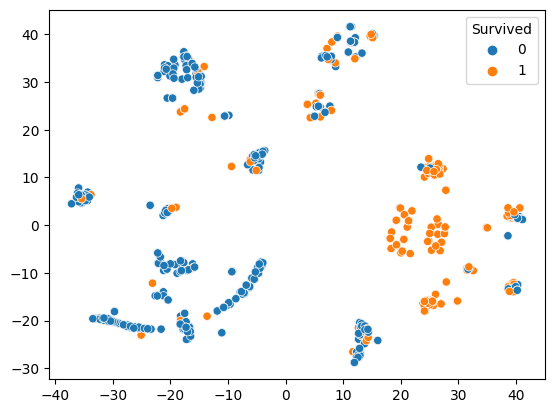

In [35]:
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_jobs=-1)
data_tsne = tsne.fit_transform(x_scaled_np)
xs = data_tsne[:, 0]
ys = data_tsne[:, 1]
sns.scatterplot(x=xs,
        y=ys,
        hue=y)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()
params = {
    "max_depth":range(3, 11)
}
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
cv.fit(x_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.8282896379525594
{'max_depth': 4}


In [38]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_np, y)
pre = clf.predict(x_predict_np)
result = pd.DataFrame({
    "PassengerId":datas_predict["PassengerId"],
    "Survived":pre
})
result.to_csv("dt.csv", encoding="utf-8", index=False)

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
params = {
    "max_depth":range(3, 11),
    "n_estimators":range(21, 150, 2)
}
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
cv.fit(x_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.8429088639201
{'max_depth': 7, 'n_estimators': 27}


In [40]:
clf = RandomForestClassifier(max_depth=7, n_estimators=27)
clf.fit(x_np, y)
pre = clf.predict(x_predict_np)
result = pd.DataFrame({
    "PassengerId":datas_predict["PassengerId"],
    "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)